<div style="font-size:48pt; line-height:25pt; font-weight:bold; text-align:center;"> Wind Farm Layout (Using GRN)</div>

D. Wilson, E. Awa, S. Cussat-Blanc, K. Veeramachaneni, and U.-M. O’Reilly. On learning to generate
wind farm layouts. In Proc. of GECCO’13, pages 767–774. ACM, 2013.

 [Introduction](#sec0)
1. [Background in wind Farm Layout Optimization](#sec1)
2. [Developmental approach and GRN](#sec2)
3. [Properties of this approach](#sec3)

[Conclusion](#sec4)

# <a id="sec1"></a> Introduction 

<img src="img/WindFLO.png" width="1000px"></img>

## The current situation 

Interesting optimisation for all involved parties because : 
- get the most wind power 
- improve the utilization of space 
- increase the commercial margin 


Very complex problem :
- local constraints : inter- turbine wind interference 
- global constraints : terrain peculiarities
- An increasingly complex problem 









## Why a new method?

Some algorithms already exist ... but : 

- too long to execute 
- to sensitive to parameters changements 

$\rightarrow$ Bottleneck in the design process 


To face those new problems $\rightarrow$ Cell based developpment 

Developmental models commonly used nowadays 

## Structure of our presentation 

- Background in wind farm layout optimization 

- Developmental approach and GRN 

- Properties of this method  

# 1. <a id="sec1"></a> Background in wind farm layout optimization

# 2. <a id="sec2"></a> Developmental approach and GRN 

## Developmental model

<img src="img/dvp-model.png" width="600px"></img>

8 inputs: wind <br>
1 action

Actions:
- divide
- reorient clockwise
- reorient counterclockwise
- wait
- kill itself

## Site Model:

2D map, flat terrain, discetized matrix + wind distribution in 24 directions

## Interturbine Interference Model:

Objective function to evaluate: expected value of the energy captured
<img src="img/nrj.png" width="700px"></img>

## GRN: cell's controller

GRN: Gene regulatory Network <br>
$\rightarrow$ living organisms

Set of proteins with different properties:
- identifier (id)
- enhancer identifier (enh)
- inhibitor identifier (inh)
- type (input, outpout, regulatory)

Affinity of a protein a with a protein b: enhancing factor and inhibiting factor
<img src="img/uab.png" width="700px"></img>

For each protein: enhancing value and inhibiting value
<img src="img/gh.png" width="700px"></img>

<img src="img/GRN-graph.png" width="900px"></img>

Protein concentration:
<img src="img/concentration.png" width="300px"></img>

input protein: current state of the environment <br>
output protein: 1 action, highest concentration

## Optimisation

Genetic Algo $\rightarrow$ optimize the network of proteins and its dynamics

GRN genome contains 2 chromosomes:
- 1 network of proteins
- 1 param optim

<img src="img/ga.png" width="900px"></img>

Crossover: Exchanging subparts of 2 networks <br><br>
Mutation: 3 ways
- random change of 1 int in a protein
- adding new protein
- removing one protein

<img src="img/paramsGA.png" width="900px"></img>

fitness = simplified economical simulation of the wind farm

Gain function:
<img src="img/C.png" width="900px"></img>

## Code example: GRN

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pygrn import grns

In [4]:
mygrn = grns.ClassicGRN()

In [5]:
mygrn.random(8, 5, 15)

In [6]:
mygrn.setup()

In [7]:
mygrn.get_concentrations()

array([0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
       0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
       0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
       0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
       0.03571429, 0.03571429, 0.03571429, 0.03571429, 0.03571429,
       0.03571429, 0.03571429, 0.03571429])

In [10]:
mygrn.warmup(8)

In [11]:
mygrn.get_concentrations()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04964484, 0.04971061,
       0.05005161, 0.05065879, 0.04937854, 0.05065629, 0.04912968,
       0.05039804, 0.04937034, 0.04996643, 0.05061748, 0.05023548,
       0.04907626, 0.0502382 , 0.05023209, 0.05080947, 0.05023715,
       0.05035322, 0.05023161, 0.04900385])

In [13]:
mygrn.set_input(np.ones(8))

In [14]:
mygrn.get_concentrations()

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.04964484, 0.04971061,
       0.05005161, 0.05065879, 0.04937854, 0.05065629, 0.04912968,
       0.05039804, 0.04937034, 0.04996643, 0.05061748, 0.05023548,
       0.04907626, 0.0502382 , 0.05023209, 0.05080947, 0.05023715,
       0.05035322, 0.05023161, 0.04900385])

In [15]:
mygrn.step()

In [16]:
mygrn.get_concentrations()

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.04975529, 0.0505247 ,
       0.04998669, 0.05230409, 0.04952526, 0.04952263, 0.0493714 ,
       0.04950842, 0.05026563, 0.04996687, 0.04956308, 0.0497751 ,
       0.0501858 , 0.04981234, 0.04983783, 0.04930409, 0.04993843,
       0.05172784, 0.04972178, 0.04940274])

In [25]:
steps = 100
for _ in range(steps):
    mygrn.step()
mygrn.get_concentrations()

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.03685603, 0.10470561,
       0.00771737, 0.20837875, 0.0424718 , 0.        , 0.05439636,
       0.        , 0.1234565 , 0.01865113, 0.        , 0.        ,
       0.1593046 , 0.        , 0.        , 0.        , 0.        ,
       0.1699493 , 0.        , 0.07411253])

In [26]:
mygrn.get_output()

array([0.03685603, 0.10470561, 0.00771737, 0.20837875, 0.0424718 ])

Example:

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

n_cities = 10
cities = np.random.rand(n_cities, 2)
rng = np.random.default_rng()

n_population = 100
population = np.array([rng.permutation(n_cities) for i in range(n_population)])
population[:5]

array([[6, 0, 4, 5, 9, 2, 7, 8, 1, 3],
       [0, 8, 3, 4, 9, 5, 2, 7, 1, 6],
       [8, 9, 3, 6, 5, 2, 7, 4, 1, 0],
       [0, 2, 5, 4, 3, 7, 8, 1, 9, 6],
       [6, 0, 8, 2, 5, 1, 7, 4, 3, 9]])

In [15]:
from pygrn import grns
GRNcities = grns.ClassicGRN()

regulatory = 15
cities = []
for i in range(10):
    cities.append(GRNcities.random(1, n_cities, regulatory))
    cities[i].setup()
    cities[i].warmup(n_cities)
    cities[i].set_input(i)
    cities[i].step()

In [16]:
cities[9].get_output()

array([0.2090026 , 0.        , 0.        , 0.08013081, 0.        ,
       0.07424633, 0.0858338 , 0.        , 0.        , 0.00558468])

In [17]:
def total_distance(order, cities):
    t = 0
    for i in range(1, len(order)):
        t += cities[order[i-1]-1].get_output()[order[i]]
    return t

In [18]:
def evaluate(population, cities):
    fitness = np.zeros(len(population))
    for i in range(len(population)):
        fitness[i] = total_distance(population[i], cities)
    return fitness

In [22]:
fitness = evaluate(population, cities)
for i in range(3):
    print(population[i], fitness[i])
print("Minimum: ")
print(population[np.argmin(fitness)], np.min(fitness))

[6 0 4 5 9 2 7 8 1 3] 0.3689644273955067
[0 8 3 4 9 5 2 7 1 6] 0.2457956280206296
[8 9 3 6 5 2 7 4 1 0] 0.45479823128246877
Minimum: 
[0 1 3 8 2 6 9 4 5 7] 0.24579562802062957


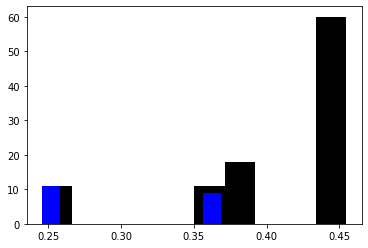

In [23]:
def truncation_selection(population, fitness, p=0.2):
    n_elites = int(np.floor(len(population) * p))
    elites = np.argsort(fitness)[:n_elites]
    return population[elites], fitness[elites]

elites, efit = truncation_selection(population, fitness)
plt.hist(fitness, color='k')
plt.hist(efit, color='b');

In [24]:
def fp_selection(population, fitness):
    p = (np.max(fitness) - fitness)
    p /= np.sum(p)
    rng = np.random.default_rng()
    ind = rng.choice(len(population), p=p)
    return population[ind], fitness[ind]

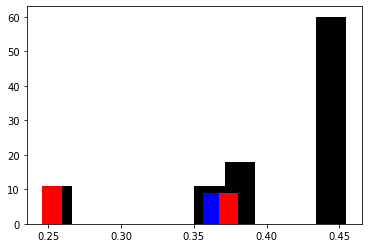

In [25]:
fp_fits = np.zeros(len(efit))
for i in range(len(efit)):
    p, f = fp_selection(population, fitness)
    fp_fits[i] = f
plt.hist(fitness, color='k')
plt.hist(efit, color='b')
plt.hist(fp_fits, color='r');

In [26]:
def tournament_selection(population, fitness, t_size=3):
    rng = np.random.default_rng()
    tournament = rng.choice(len(population), size=t_size)
    ind = tournament[np.argmin(fitness[tournament])]
    return population[ind], fitness[ind]

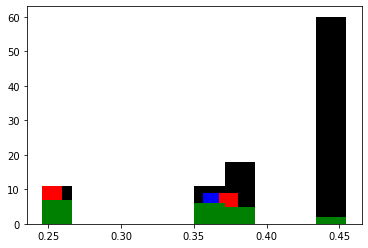

In [27]:
t_fits = np.zeros(len(efit))
for i in range(len(efit)):
    p, f = tournament_selection(population, fitness)
    t_fits[i] = f
plt.hist(fitness, color='k')
plt.hist(efit, color='b')
plt.hist(fp_fits, color='r')
plt.hist(t_fits, color='g');

In [28]:
def one_point(p1, p2):
    rng = np.random.default_rng()
    x = rng.choice(np.arange(1, np.minimum(len(p1)-1, len(p2)-1)))
    return np.concatenate((p1[:x], p2[x:])), np.concatenate((p2[:x],p1[x:]))

In [29]:
parent1, _ = tournament_selection(population, fitness)
parent2, _ = tournament_selection(population, fitness)
print(parent1, parent2)
child1, child2 = one_point(parent1, parent2)
print("crossover: ")
print(child1, child2)

[3 6 5 4 1 8 7 0 2 9] [6 0 8 2 5 1 7 4 3 9]
crossover: 
[3 0 8 2 5 1 7 4 3 9] [6 6 5 4 1 8 7 0 2 9]


In [30]:
from pymoo.operators.crossover import edge_recombination_crossover as erc

print(population[0], population[1])
erc.erx(population[0], population[1])

[6 0 4 5 9 2 7 8 1 3] [0 8 3 4 9 5 2 7 1 6]


[1, 6, 0, 8, 3, 4, 5, 9, 2, 7]

In [31]:
def mutate(ind):    
    rng = np.random.default_rng()
    x = rng.choice(len(ind))
    child = np.copy(ind)
    child[x] = ind[x+1]
    child[x+1] = ind[x]
    return child

In [32]:
print(population[0], population[1])
child = erc.erx(population[0], population[1])
print(child)
mutate(child)

[6 0 4 5 9 2 7 8 1 3] [0 8 3 4 9 5 2 7 1 6]
[3, 6, 0, 8, 1, 7, 2, 9, 4, 5]


array([3, 0, 6, 8, 1, 7, 2, 9, 4, 5])

In [35]:
def ga_step(population):
    fitness = evaluate(population, cities)
    next_pop, _ = truncation_selection(population, fitness)
    while len(next_pop) < len(population):
        parent1, _ = tournament_selection(population, fitness)
        parent2, _ = tournament_selection(population, fitness)
        child = erc.erx(parent1, parent2)
        child = mutate(child)
        next_pop = np.concatenate((next_pop, [child]))
    return next_pop, fitness

In [42]:
n_gen = 100
minfit = np.zeros(n_gen)
for i in range(n_gen):
    print(np.size(population))
    population, fitness = ga_step(population)
    minfit[i] = np.min(fitness)
    if i > 2 and minfit[i] < minfit[i-1]:
        print(i, minfit[i])

1000


IndexError: list index out of range

# 3. <a id="sec3"></a> Properties of this approach 

## Experiments

### First experiment: <br>
Entry parameters: <br>
- wind distribution
- farm parameters

Configuration and tools:<br>
- 14km by 7km 2D-flat field
- genetic algorithm
- wind farm evaluation model

Results: The algorithm converges after 4 hours of learning on 128 CPUs, totaling 512 hours

<img src="img/figure_3.PNG" width="1000px"></img>

Observations: <br>
- cells follow development fronts to spread
- 3 steps in the development : 
    1. local zone
    2. less efficient cells die
    3. optimisation

## Comparison with other approaches

Introduction of one evaluation tool: the WAKE FREE RATIO <br>
    
"Represents usage of the turbines. 100% means that all turbines are running at their theoretical maximum"

<img src="img/formule_wake_free_ratio.PNG" width="300px"></img>

<img src="img/figure_4.PNG" width="900px"></img>

Observations: <br>
- the energy produced increase
- periodic diminution of the energy produced 

Comparison with other approaches

TDA (Turbine Distribution Algorithm) 200k: <br>
- best existing method in the industry 
- based on randomized modification of turbine location

Difference between both methods : TDA uses a finite number of turbines

<img src="img/figure_5.PNG" width="900px"></img>

Observations:<br>
- wake free ratio : development algorithm < TDA 200k
- computing time : development algortithm >> TDA 200k
    
Advantage of a reduced computation time: keep the design interactive for humans 

Other advantages of the developmental method: <br>
- Scalability 
- Avoiding natural obstacles

<img src="img/figure_6.PNG" width="1100px"></img>

Observations: <br>
- Computation time : 15 seconds
- Wake free ratio : 81,3%
- Turbine row along the lake
- One algorithm default : the stop time

General conclusions and comparison with TDA approach: <br>
- lower wake free ratio 
- shorter computation time that makes the development model more interactiv and easily adjustable to the environment
- one difficulty remains : determine the stop time

## Scalability of the method 

We use the same trained cell in three differents environments 

<img src="img/imgscalability1.png" width="1000px"></img>

<img src="img/imgscalability2.png" width="1100px"></img>

#  <a id="sec4"></a> Conclusion 